# 마스크 착용 상태 분류 Train Data EDA

In [28]:
# 필요한 패키지 import

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
from glob import glob
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# Train Label 확인

In [29]:
train_csv = pd.read_csv("D:\MaskClaasification\data\\train\\train.csv")
print("train_csv shape : ", train_csv.shape)
print()
print("------------ train data ------------")
print(train_csv)

train_csv shape :  (2700, 5)

------------ train data ------------
          id  gender   race  age                    path
0     000001  female  Asian   45  000001_female_Asian_45
1     000002  female  Asian   52  000002_female_Asian_52
2     000004    male  Asian   54    000004_male_Asian_54
3     000005  female  Asian   58  000005_female_Asian_58
4     000006  female  Asian   59  000006_female_Asian_59
...      ...     ...    ...  ...                     ...
2695  006954    male  Asian   19    006954_male_Asian_19
2696  006955    male  Asian   19    006955_male_Asian_19
2697  006956    male  Asian   19    006956_male_Asian_19
2698  006957    male  Asian   20    006957_male_Asian_20
2699  006959    male  Asian   19    006959_male_Asian_19

[2700 rows x 5 columns]


### label별 분포

In [6]:
gender = train_csv["gender"]
age = train_csv["age"]

print("<age 정보>")
print(age.describe())
print()

print("<gender 정보>")
print(gender.value_counts())

<age 정보>
count    2700.000000
mean       37.708148
std        16.985904
min        18.000000
25%        20.000000
50%        36.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64

<gender 정보>
female    1658
male      1042
Name: gender, dtype: int64


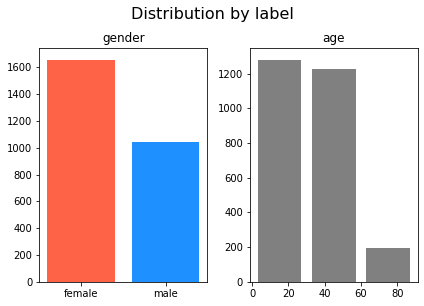

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title("gender")
ax[0].bar(list(gender.value_counts().index), gender.value_counts().values, color = [ "tomato", 'dodgerblue'])

ax[1].set_title("age")
bins = np.arange(0, 100, 30)
ax[1].hist(age, bins, color = 'gray', rwidth = 0.8)

fig.suptitle("Distribution by label", fontsize = 16, y = 1.05)
fig.tight_layout()

plt.show()


- 여자가 남자보다 훨씬 많다. 
- 10/20/50대가 대부분이다. 30/40/60대는 많이 없다. 

[2745, 2050, 415, 3660, 4085, 545, 549, 410, 83, 732, 817, 109, 549, 410, 83, 732, 817, 109]


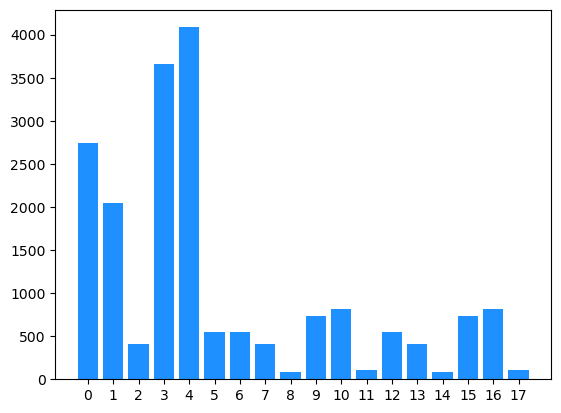

In [30]:
multi_class_label = [0] *18

for i, row in train_csv.iterrows():
    label = 0
    label += 3 if row.gender == "female" else 0
    if row.age < 30:
        label += 0
    elif row.age < 60:
        label += 1
    else:
        label += 2
    
    label_wear = 0 + label
    label_incorrect = 6 + label
    label_not_wear = 12 + label
    
    multi_class_label[label_wear] += 5
    multi_class_label[label_incorrect] += 1
    multi_class_label[label_not_wear] += 1

print(multi_class_label)
plt.bar( range(18) , multi_class_label, color = "dodgerblue")
plt.xticks(range(18))
plt.show()
    

### label 상관 관계

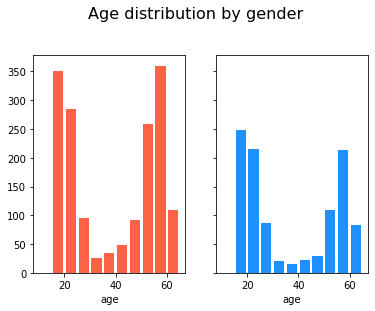

In [5]:
# 성별에 따른 연령 분포

age_f = (train_csv.loc[train_csv.gender == "female"])["age"]
age_m = (train_csv.loc[train_csv.gender == "male"])["age"]

bins = np.arange(10, 70, 5)

fig, ax = plt.subplots(1,2, sharey=True)
ax[0].hist(age_f, bins, rwidth = 0.8, color = "tomato")
ax[0].set_xlabel("age")

ax[1].hist(age_m, bins, rwidth = 0.8, color = "dodgerblue")
ax[1].set_xlabel("age")

fig.suptitle("Age distribution by gender",fontsize = 16, y = 1.05)

plt.show()

-----------female-------------
count    1658.000000
mean       38.528347
std        16.888379
min        18.000000
25%        20.000000
50%        44.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64
-----------male-------------
count    1042.000000
mean       36.403071
std        17.066934
min        18.000000
25%        20.000000
50%        26.000000
75%        56.000000
max        60.000000
Name: age, dtype: float64


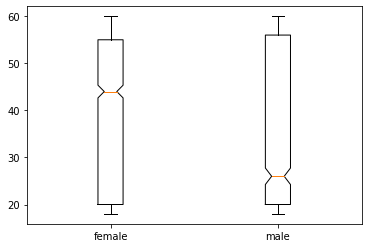

In [6]:
print("-----------female-------------")
print(age_f.describe())

print("-----------male-------------")
print(age_m.describe())

plt.boxplot([age_f, age_m], notch=True)
plt.xticks([1,2],["female", "male"])

plt.show()

- 여성과 남성의 나이 분포는 거의 비슷하지만 중앙값에 차이가 있다. 

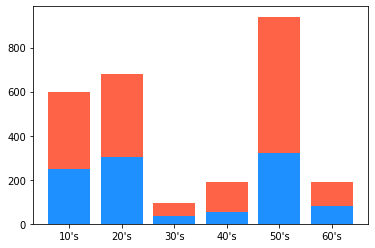

In [7]:
# 연령에 따른 성별 분포

labels = ["10's", "20's", "30's", "40's", "50's", "60's"]
bins = np.arange(10, 80, 10)
female, _ = np.histogram(age_f, bins)
male, _ = np.histogram(age_m, bins)

plt.bar(labels, male, color = "dodgerblue")
plt.bar(labels, female, bottom = male, color = "tomato")

plt.show()


* 50대에서 여성과 남성 비율 차이가 심하다. 

# image 살펴보기

### id(마스크 착용 여부)에 따른 이미지

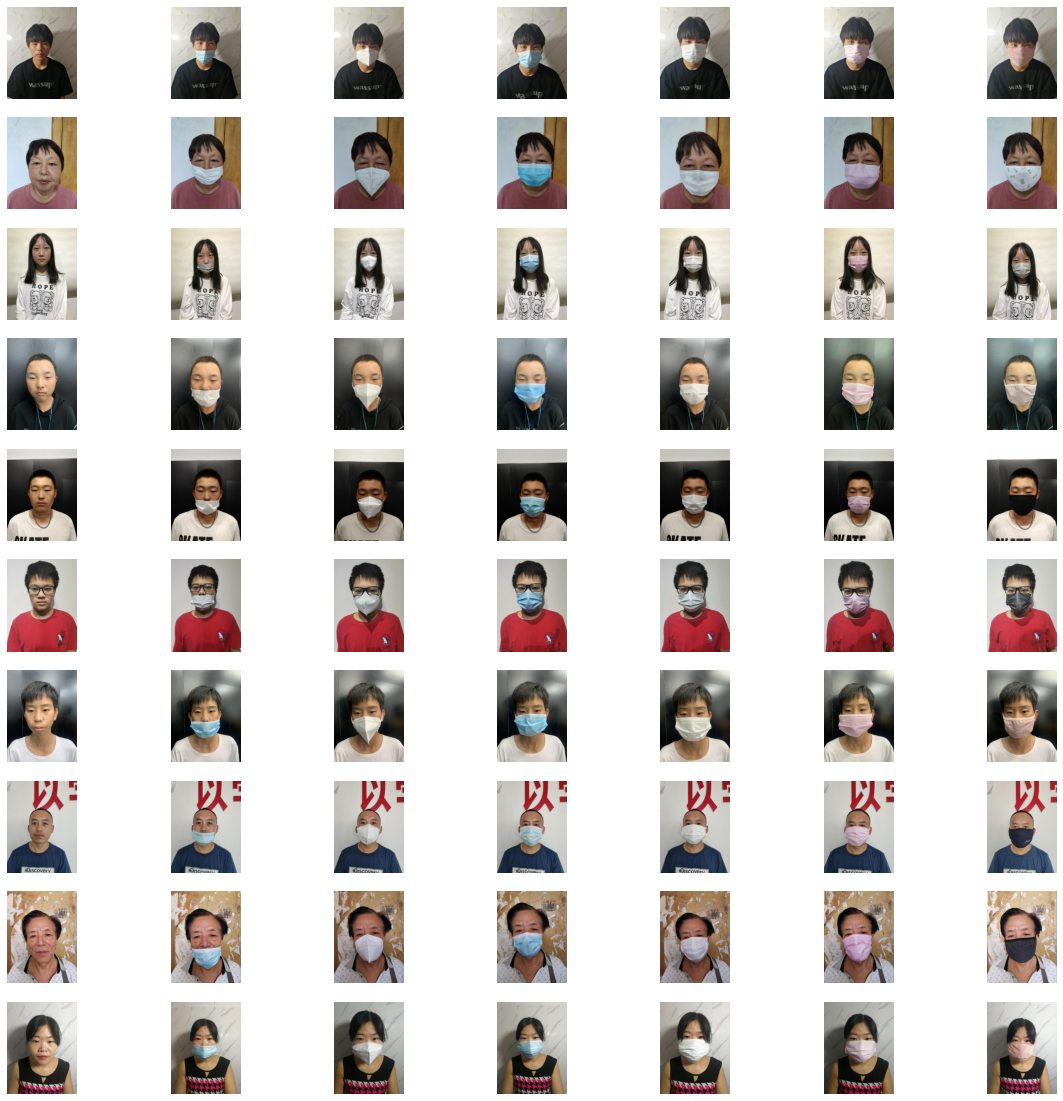

In [3]:
import os

dir_path = "../input/data/train/images"
files = ["normal", "incorrect_mask", "mask1", "mask2", "mask3", "mask4", "mask5"]
plt.figure(figsize = (20,20))


for idx, folder in enumerate(train_csv["path"].sample(10)):
    path = os.path.join(dir_path, folder)
    _, ext = os.path.splitext(os.listdir(path)[0])
    
    for i in range(7):
        file = os.path.join(path, files[i]) + ext
        img = Image.open(file)
        
        plt.subplot(10, 7, idx*7 + i +1)
        plt.axis("off")
        plt.imshow(img)
    

* 대부분의 사진은 사람이 정중앙에서 정면을 바라보는 사진이다.
* mask5 사진은 다양한 마스크, 스카프 등으로 얼굴을 가린 사진이다. 

### image 정보와 size

In [9]:
dir_path = "../input/data/train/images"
folders = train_csv["path"].values[:100]

heights = []
widths = []
means = []
stds = []

for folder in tqdm(folders):
    for file in glob(os.path.join(dir_path, folder, "*")):
        img = np.array(Image.open(file))
        h, w, _ = img.shape
        heights.append(h)
        widths.append(w)
        means.append(img.mean(axis = (0, 1)))
        stds.append(img.std(axis = (0, 1)))        

In [10]:
print("<image size>")
print("height : ", pd.Series(heights).unique())
print("width : ", pd.Series(widths).unique())

<image size>
height :  [512]
width :  [384]


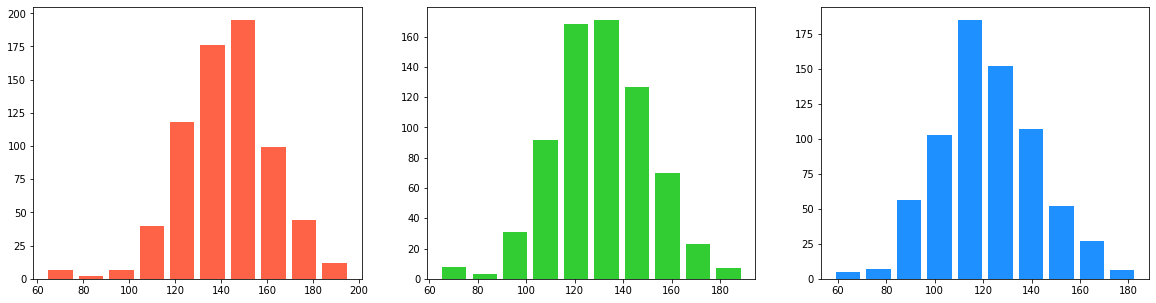

In [11]:
# RGB 채널 별 값 분포

plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1)
plt.hist(np.array(means)[:, 0], rwidth = 0.8, color = "tomato")

plt.subplot(1, 3, 2)
plt.hist(np.array(means)[:, 1], rwidth = 0.8, color = "limegreen")

plt.subplot(1, 3, 3)
plt.hist(np.array(means)[:, 2], rwidth = 0.8, color = "dodgerblue")

plt.show()

### RGB 통계와 라벨 관계

In [12]:
dir_path = "../input/data/train/images"
files = ["normal", "incorrect_mask", "mask1", "mask2", "mask3", "mask4", "mask5"]
folders = train_csv["path"].values[:100]

bri = [[], [], [], [], [], [], []]

for folder in tqdm(folders):
    for idx in range(7):
        path = glob(os.path.join(dir_path, folder, files[idx]) + ".*")[0]
        img = np.array(Image.open(path))
        bri[idx].append(img.mean(axis=(0,1)))
        


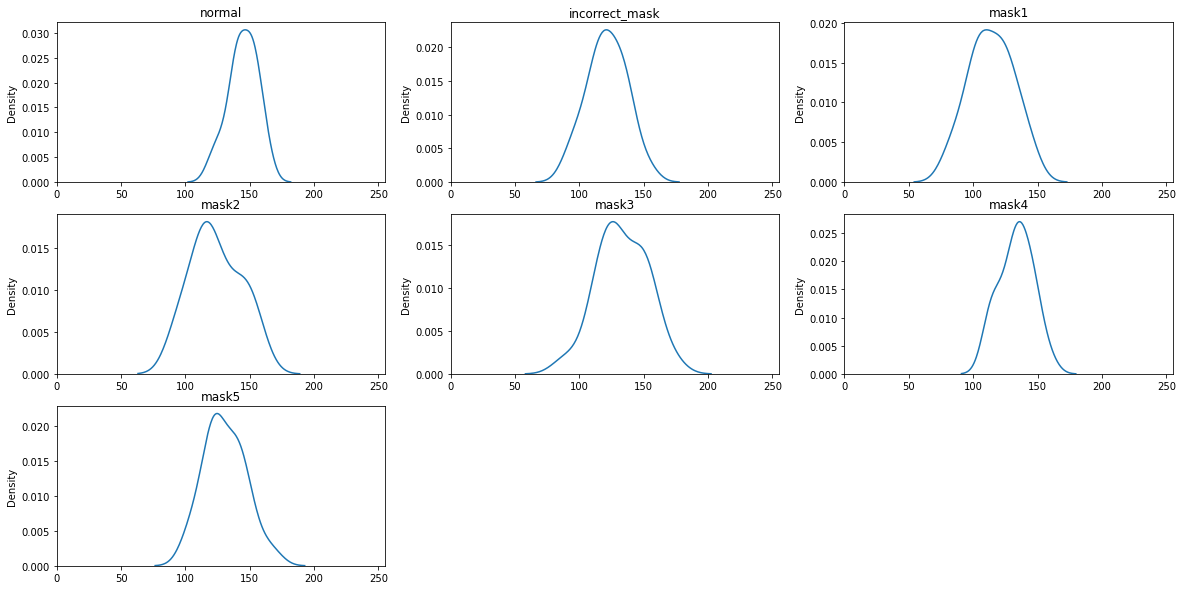

In [13]:
# label별 이미지 밝기 분포

plt.figure(figsize = (20,10))

for idx in range(1, 8):
    plt.subplot(3, 3, idx)
    sns.distplot(np.array(bri)[:, idx-1], hist=False, kde=True)
    plt.title(files[idx-1])
    plt.xlim((0,255))
    
plt.show()

### Data Noise

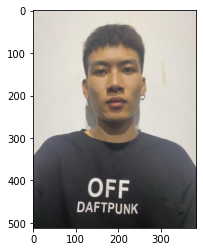

../input/data/train/images/006360_female_Asian_18/normal.jpg


In [14]:
# gender labeling 요류

dir_path = "../input/data/train/images"
folder = train_csv.loc[2400].path
file = os.path.join(dir_path, folder, "normal")
file = glob(file + ".*")[0]

img = Image.open(file)

plt.imshow(img)
plt.show()

print(file)

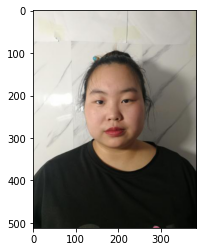

../input/data/train/images/001498-1_male_Asian_23/normal.jpg


In [15]:
# gender labeling 요류

dir_path = "../input/data/train/images"
folder = train_csv.loc[764].path
file = os.path.join(dir_path, folder, "normal")
file = glob(file + ".*")[0]

img = Image.open(file)

plt.imshow(img)
plt.show()

print(file)

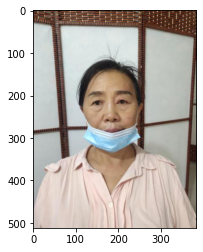

../input/data/train/images/000020_female_Asian_50/normal.jpg


In [16]:
# mask labeling 요류

dir_path = "../input/data/train/images"
folder = train_csv.loc[15].path
file = os.path.join(dir_path, folder, "normal")
file = glob(file + ".*")[0]

img = Image.open(file)

plt.imshow(img)
plt.show()

print(file)

- 성별, 마스크 착용 여부 등 라벨링 오류가 많다. 

# 결과

1. 데이터 불균형 문제
    - 성별 불균형 
    
       여성이 남성보다 많다. 
   
    - 나이 불균형
    
       60살이 최고 연령이고 60대의 비율이 너무 적다. 60 이상을 구분해내기 어려울 것 같다. 
   
    - 마스크 착용 : 오착용 : 착용X = 5 : 1 : 1
    
       오착용과 착용하지 않은 사진이 너무 적다. 

2. 라벨링 오류
성별과 마스크 착용 상태에서 라벨링이 잘못된 사진이 꽤 있는 것으로 보인다. 

3. 주의할 점
    - 파일 확장자로 png, jpg가 섞여서 사용되었다. 
    - 오착용의 경우 턱스크, 코스크가 대부분이지만 눈을 가리는 등 다른 경우도 존재한다.
    - 같은 사람 사진은 배경이 같지만 사람마다 다른 배경에서 찍은 사진이다. 

# 성별 오류 확인

In [3]:
from torchvision import models, transforms
import torch
from torch.utils.data import Dataset, DataLoader

model = models.resnet34(pretrained = True)
for param in model.parameters():
    param.requires_grad = False
model.fc = torch.nn.Linear(512, 1)

model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])

class GenderDataset(Dataset):
    def __init__(self):
        self.dir_path = "../input/data/train/images"
        self.file = "normal"
        self.folders = train_csv["path"]
        self.genders = train_csv["gender"].apply(lambda x :1.0 if x=="male" else 0.0)
        
    def __len__(self):
        return len(self.folders)
    
    def __getitem__(self, idx):
        self.path = os.path.join(self.dir_path, self.folders[idx], self.file)
        self.path = glob(self.path + ".*")[0]
        
        self.img = transform(Image.open(self.path))
        
        return self.img, self.genders[idx]
        

In [5]:
gender_dataset = GenderDataset()
gender_dataloader = DataLoader(gender_dataset, batch_size = 64, shuffle = True)

In [6]:
from torch.optim import Adam

criterion = torch.nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [7]:
model.train()

for epoch in range(5):
    for idx, (img, label) in enumerate(gender_dataloader):
        img = img.cuda()
        label = label.reshape(-1, 1).float().cuda()

        optimizer.zero_grad()
        
        pred_label = torch.nn.Sigmoid()(model.forward(img))
        
        loss = criterion(pred_label, label)
        
        loss.backward()
        optimizer.step()
        
        print("Epoch : %3d, Iter [%3d/%3d], Loss : %.4f" %(epoch, idx, len(gender_dataloader), loss))


Epoch :   0, Iter [  0/ 43], Loss : 0.7585
Epoch :   0, Iter [  1/ 43], Loss : 0.7513
Epoch :   0, Iter [  2/ 43], Loss : 0.8173
Epoch :   0, Iter [  3/ 43], Loss : 0.7185
Epoch :   0, Iter [  4/ 43], Loss : 0.6657
Epoch :   0, Iter [  5/ 43], Loss : 0.6380
Epoch :   0, Iter [  6/ 43], Loss : 0.6596
Epoch :   0, Iter [  7/ 43], Loss : 0.6397
Epoch :   0, Iter [  8/ 43], Loss : 0.6609
Epoch :   0, Iter [  9/ 43], Loss : 0.6239
Epoch :   0, Iter [ 10/ 43], Loss : 0.6477
Epoch :   0, Iter [ 11/ 43], Loss : 0.5757
Epoch :   0, Iter [ 12/ 43], Loss : 0.5624
Epoch :   0, Iter [ 13/ 43], Loss : 0.6818
Epoch :   0, Iter [ 14/ 43], Loss : 0.5859
Epoch :   0, Iter [ 15/ 43], Loss : 0.5410
Epoch :   0, Iter [ 16/ 43], Loss : 0.5881
Epoch :   0, Iter [ 17/ 43], Loss : 0.6321
Epoch :   0, Iter [ 18/ 43], Loss : 0.5579
Epoch :   0, Iter [ 19/ 43], Loss : 0.5338
Epoch :   0, Iter [ 20/ 43], Loss : 0.5836
Epoch :   0, Iter [ 21/ 43], Loss : 0.5565
Epoch :   0, Iter [ 22/ 43], Loss : 0.5055
Epoch :   0

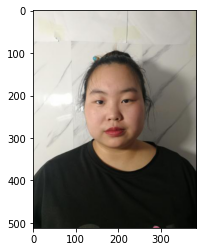

tensor([[0.1495]], device='cuda:0', grad_fn=<SigmoidBackward>)

In [22]:
model.eval()

dir_path = "../input/data/train/images"
folder = train_csv.loc[764].path
file = os.path.join(dir_path, folder, "normal")
file = glob(file + ".*")[0]

img = Image.open(file)
plt.imshow(img)
plt.show()

img = transform(img).unsqueeze(0).cuda()

torch.nn.Sigmoid()(model.forward(img))

In [32]:
model.eval()

dir_path = "../input/data/train/images"
error_list = []

for idx in range(len(train_csv)):
    folder = train_csv.loc[idx].path
    file = os.path.join(dir_path, folder, "normal")
    file = glob(file + ".*")[0]
    
    img = Image.open(file)
    img = transform(img).unsqueeze(0).cuda()
    
    gender = int(torch.nn.Sigmoid()(model.forward(img)) + 0.5)
    
    if train_csv.loc[idx].gender == "male" and gender == 0:
        error_list.append(train_csv.loc[idx].path)
        
    if train_csv.loc[idx].gender == "female" and gender == 1:
        error_list.append(train_csv.loc[idx].path)


print(error_list)
    

['000067_female_Asian_54', '000078_female_Asian_55', '000225_female_Asian_25', '000309_male_Asian_29', '000511_female_Asian_55', '000512_female_Asian_55', '000516_female_Asian_52', '000525_female_Asian_53', '000528_female_Asian_51', '000533_female_Asian_54', '000534_female_Asian_50', '000535_female_Asian_50', '000539_female_Asian_54', '000542_female_Asian_58', '000550_male_Asian_56', '000557_female_Asian_57', '000566_male_Asian_58', '000574_female_Asian_56', '000609_male_Asian_57', '000615_male_Asian_56', '000631_female_Asian_57', '000644_female_Asian_54', '000650_male_Asian_54', '000675_female_Asian_59', '000688_female_Asian_57', '000724_female_Asian_57', '000736_female_Asian_53', '000760_female_Asian_50', '000767_female_Asian_56', '000776_female_Asian_57', '000825_male_Asian_53', '000826_female_Asian_55', '001002_female_Asian_42', '001025_male_Asian_19', '001026-1_male_Asian_25', '001031_female_Asian_45', '001043-1_male_Asian_23', '001069_female_Asian_19', '001092_female_Asian_18', '

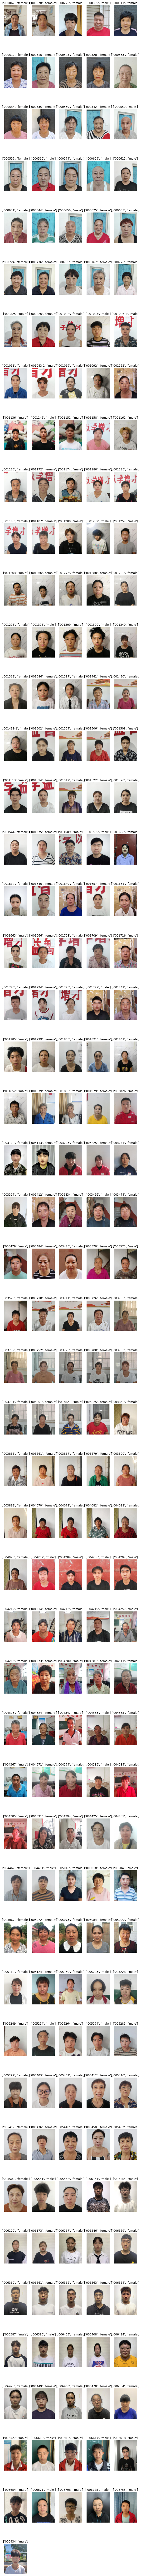

In [53]:
plt.figure(figsize = (10,200))

for idx, folder in enumerate(error_list):
    dir_path = "../input/data/train/images"
    file = os.path.join(dir_path, folder, "normal")
    file = glob(file + ".*")[0]

    img = Image.open(file)
    
    plt.subplot(50, 5, idx + 1)
    plt.axis("off")
    plt.imshow(img)
    plt.title(folder.split("_")[:2] )
    
plt.show()
    

# Augmentation 실험
prespective + color jitter

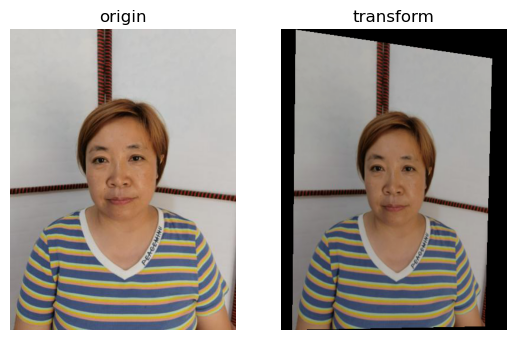

In [27]:
from torchvision import transforms
dir_path = "D:\MaskClaasification\data\\train\images\\000001_female_Asian_45\\normal.jpg"

img = Image.open(dir_path)
plt.subplot(1,2,1)
plt.title("origin")
plt.axis("off")
plt.imshow(img)

transform = transforms.Compose([
    transforms.RandomPerspective(0.2,1),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.01, hue=0.01)
])

img_trans = transform(img)
plt.subplot(1,2,2)
plt.title("transform")
plt.axis("off")
plt.imshow(img_trans)


plt.show()

# LOSS 실험

In [31]:
multi_class_label

[2745,
 2050,
 415,
 3660,
 4085,
 545,
 549,
 410,
 83,
 732,
 817,
 109,
 549,
 410,
 83,
 732,
 817,
 109]

In [32]:
# focal loss weight
beta = 0.9999
w = [(1-beta)/(1-beta**n) for n in multi_class_label]
w

[0.0004165652560834198,
 0.0005394877106257007,
 0.002459863910979232,
 0.00032625374599569955,
 0.0002981807067626763,
 0.001885224807564291,
 0.0018718600484659816,
 0.0024892441111694892,
 0.012097659521450886,
 0.0014166618874551819,
 0.001274609799184368,
 0.00922394404105895,
 0.0018718600484659816,
 0.0024892441111694892,
 0.012097659521450886,
 0.0014166618874551819,
 0.001274609799184368,
 0.00922394404105895]